# Machine Learning for Trading


📚Join the Alpha Quant Program: https://www.quantreo.com  <br>
(And receive a full "Machine Learning for Trading" course 100% free for the ones who join before the Black Friday (29/11/24)).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
from Signals import *
from FeaturesLibrary import *

/var/folders/lp/js1h148s3d3fw94k4v01t35h0000gn/T/ipykernel_31760/2862613872.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df = pd.read_csv("4-hours_EURUSD.csv", parse_dates=True, index_col="time")
df

,open,high,low,close,tick_volume,low_time,high_time
time,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00
...,...,...,...,...,...,...,...
2023-09-19 16:00:00,1.06997,1.07014,1.06785,1.06848,13607,2023-09-19 19:36:00,2023-09-19 16:00:00
2023-09-19 20:00:00,1.06848,1.06918,1.06761,1.06790,6544,2023-09-19 22:00:00,2023-09-19 20:24:00
2023-09-20 00:00:00,1.06790,1.06860,1.06768,1.06849,2478,2023-09-20 00:00:00,2023-09-20 03:36:00


### Create the Target

In [3]:
# Create the labels (that will allow us to find the interesting features that are related to them)
df["time"] = df.index
df["time"] = df["time"].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
df = get_barrier(df, tp=.0050, sl=-.0035, buy=True)

100%|██████████| 13676/13676 [00:08<00:00, 1653.72it/s]

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


In [4]:
def dummy_labeling(df):
    df_copy = df.copy()
    
    df_copy["dummy"] = -1
    df_copy.loc[df_copy["labeling"]<0, "dummy"] = 0
    df_copy.loc[0<df_copy["labeling"], "dummy"] = 1
    
    df_copy = df_copy[df_copy["dummy"]!=-1]
    
    return df_copy

In [5]:
df = dummy_labeling(df)
df

,open,high,low,close,tick_volume,low_time,high_time,time,labeling,dummy
time,,,,,,,,,,
2015-01-02 12:00:00,1.20467,1.20600,1.20347,1.20377,14827,2015-01-02 15:36:00,2015-01-02 12:48:00,2015-01-02 12:00:00,-11.2,0
2015-01-02 16:00:00,1.20377,1.20437,1.20069,1.20131,19160,2015-01-02 19:36:00,2015-01-02 16:00:00,2015-01-02 16:00:00,-56.8,0
2015-01-02 20:00:00,1.20133,1.20154,1.20011,1.20029,9335,2015-01-02 23:12:00,2015-01-02 20:00:00,2015-01-02 20:00:00,-52.8,0
2015-01-03 00:00:00,1.20030,1.20055,1.19997,1.20014,1351,2015-01-03 00:24:00,2015-01-03 00:00:00,2015-01-03 00:00:00,-48.8,0
2015-01-05 00:00:00,1.19454,1.19755,1.18642,1.19624,13941,2015-01-05 00:48:00,2015-01-05 03:36:00,2015-01-05 00:00:00,-0.8,0
...,...,...,...,...,...,...,...,...,...,...
2023-09-15 08:00:00,1.06533,1.06688,1.06488,1.06657,12931,2023-09-15 08:00:00,2023-09-15 11:12:00,2023-09-15 08:00:00,103.2,1
2023-09-15 16:00:00,1.06504,1.06878,1.06497,1.06722,20501,2023-09-15 16:00:00,2023-09-15 16:48:00,2023-09-15 16:00:00,95.2,1
2023-09-18 00:00:00,1.06611,1.06718,1.06589,1.06715,2638,2023-09-18 00:00:00,2023-09-18 02:48:00,2023-09-18 00:00:00,39.2,1


### Create the Features

In [6]:
df = DC_market_regime(df, 0.015)
df = spread(df)
df = kama_market_regime(df, "close", 30, 100)
df = gap_detection(df)
for i in [1,2,5,10,20,50]:
    df = auto_corr(df, "close", n=50, lag=i)
    df = log_transform(df, "close", i)
df = candle_information(df)
df = moving_yang_zhang_estimator(df, 100)

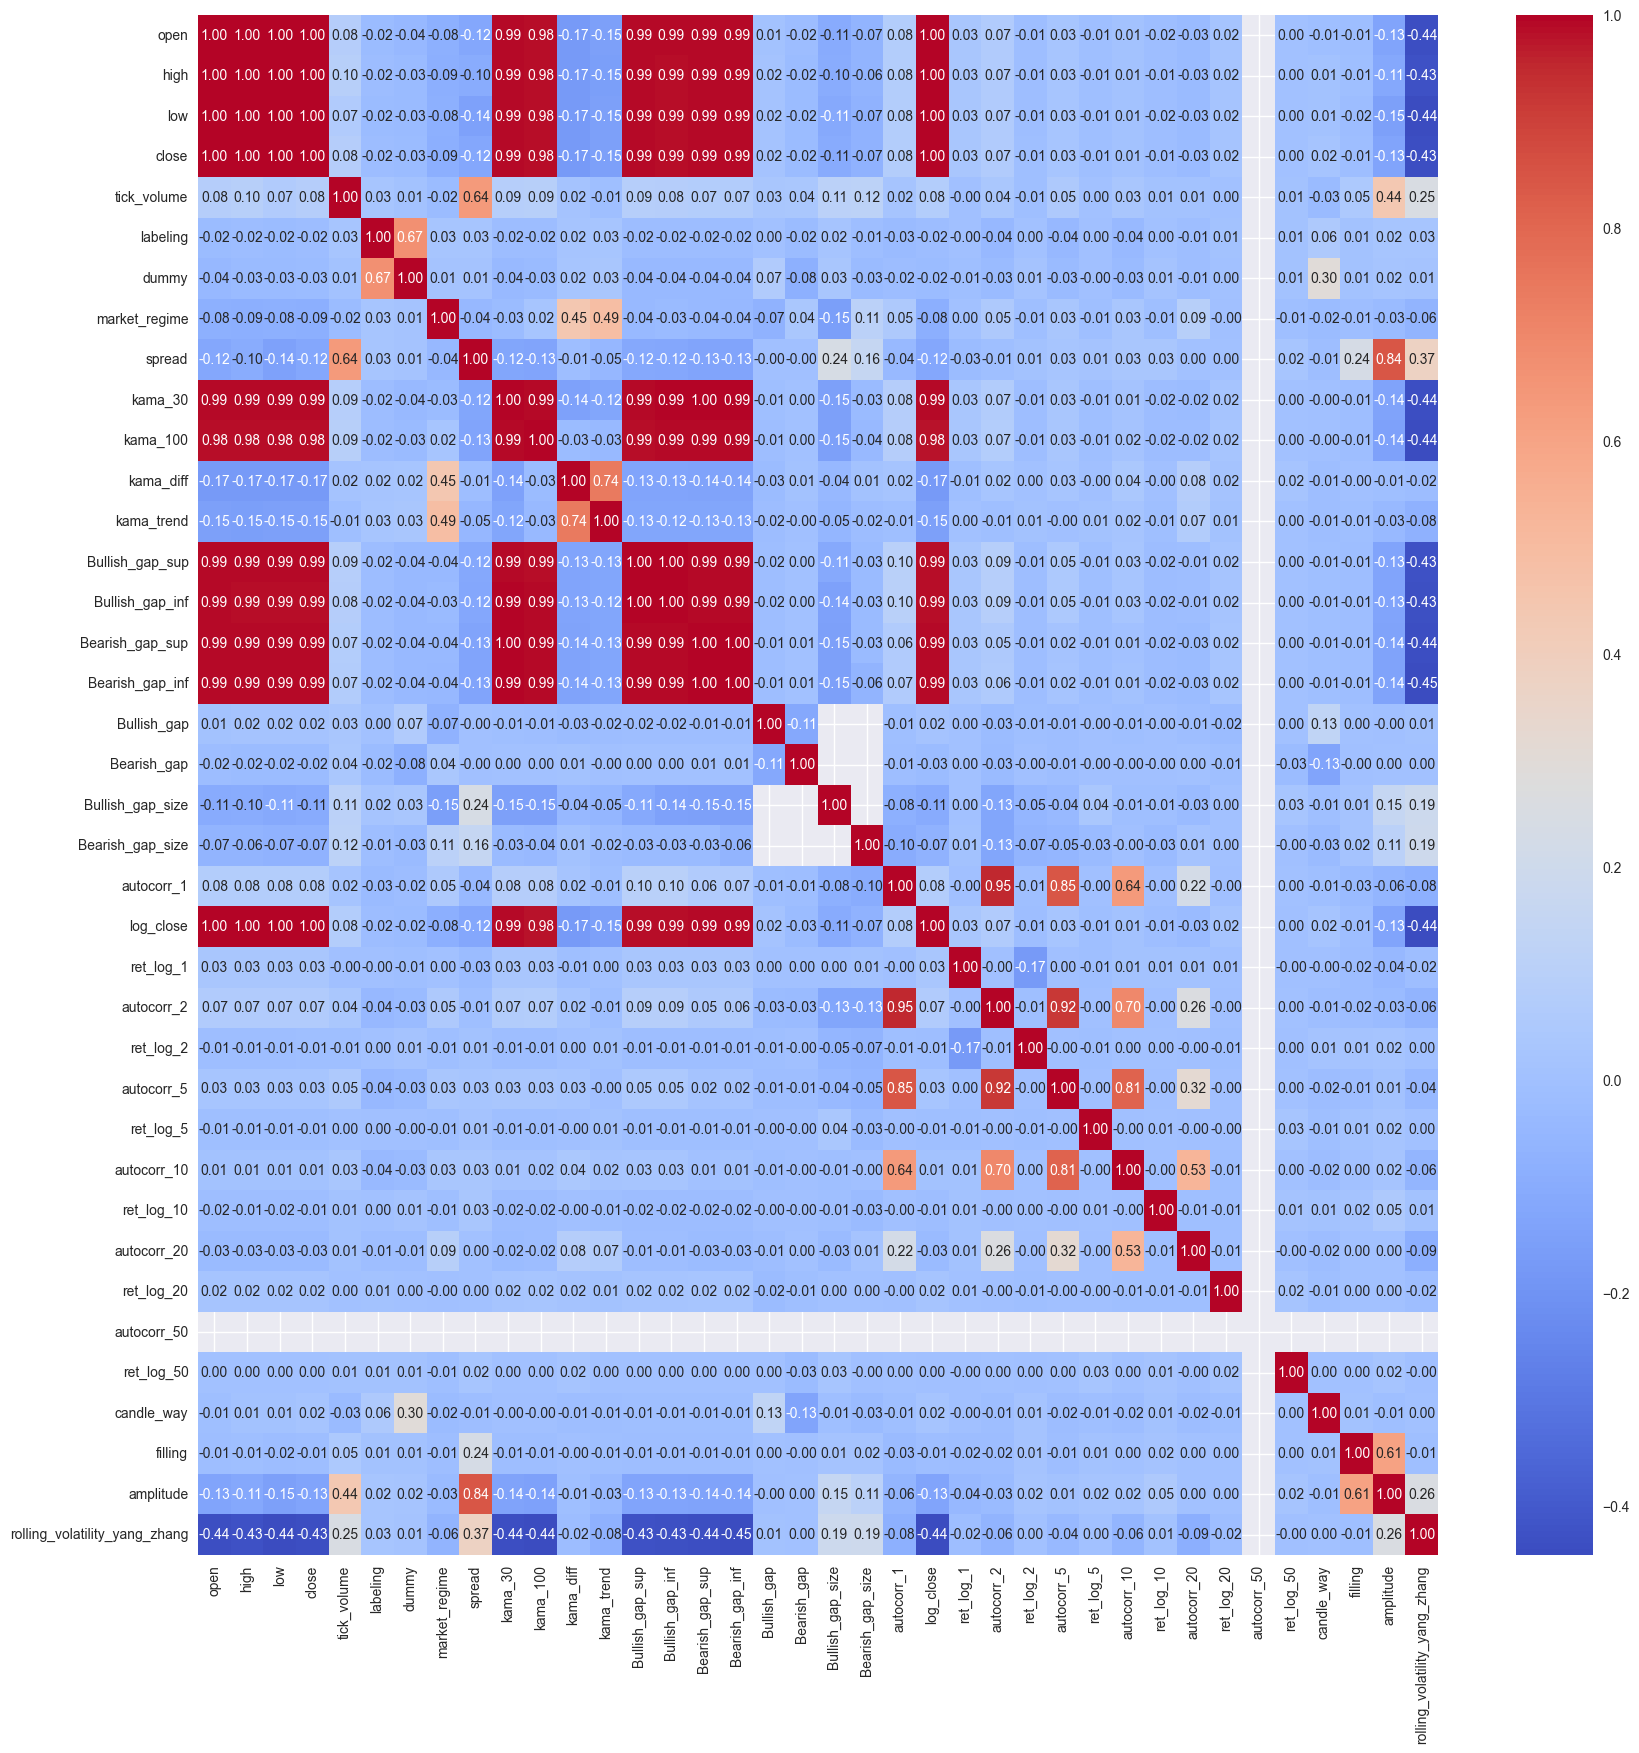

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")  # Ajoute des annotations arrondies à 2 chiffres
plt.show()

In [112]:
list_X = ["candle_way", "filling", "spread", "tick_volume",
          'ret_log_1', 'ret_log_2', 'ret_log_5', 'ret_log_10',
       'ret_log_20', 'ret_log_50', 'autocorr_1', 'autocorr_2', 'autocorr_5',
       'autocorr_20',"autocorr_10", "kama_diff", "amplitude", "kama_trend"]
col_y = "dummy"

In [113]:
df_clean = df[list_X + [col_y]].dropna()
df_clean

,candle_way,filling,spread,tick_volume,ret_log_1,ret_log_2,ret_log_5,ret_log_10,ret_log_20,ret_log_50,autocorr_1,autocorr_2,autocorr_5,autocorr_20,autocorr_10,kama_diff,amplitude,kama_trend,dummy
time,,,,,,,,,,,,,,,,,,,
2015-01-26 12:00:00,1,0.203655,0.00383,10329,0.006106,0.058206,0.029078,-0.080219,-0.193461,-0.288456,0.959844,0.921000,0.749149,0.445327,0.351209,-0.010860,0.069393,-1,1
2015-01-26 16:00:00,1,0.832075,0.00530,12545,0.033377,0.039687,0.066683,-0.037347,-0.169750,-0.251320,0.960101,0.920573,0.744855,0.427490,0.371920,-0.010106,0.391431,-1,1
2015-01-26 20:00:00,-1,0.730028,0.00363,5263,-0.019393,0.013336,0.076842,-0.006530,-0.193958,-0.283937,0.959460,0.919835,0.740788,0.397677,0.398618,-0.009351,0.235030,-1,0
2015-01-27 00:00:00,-1,0.876972,0.00317,3313,-0.020647,-0.039640,0.050178,0.038940,-0.207818,-0.292653,0.959102,0.918505,0.756045,0.371539,0.433619,-0.008613,0.247151,-1,1
2015-01-27 04:00:00,1,0.389344,0.00244,3141,0.007797,-0.013011,0.006258,-0.023727,-0.203979,-0.282287,0.958652,0.917607,0.764597,0.336745,0.471680,-0.007999,0.084521,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 08:00:00,1,0.620000,0.00200,12931,0.018231,0.035282,-0.015883,-0.098065,-0.101693,-0.155579,0.856849,0.644046,0.062834,-0.565703,-0.339060,0.004741,0.116328,1,1
2023-09-15 16:00:00,1,0.572178,0.00381,20501,0.009453,0.027856,0.035382,-0.075559,-0.087637,-0.146767,0.874744,0.666487,0.169592,-0.673101,-0.421394,0.004568,0.204478,1,1
2023-09-18 00:00:00,1,0.806202,0.00129,2638,-0.001008,0.008436,0.041343,-0.089508,-0.058142,-0.099489,0.878336,0.683430,0.235597,-0.646573,-0.452370,0.004392,0.097503,1,1


In [139]:
# Clean before
X_train = balanced_df.iloc[0:7_999,:][list_X]
y_train = balanced_df.iloc[1:8_000,:][col_y]

X_test = df_clean.iloc[10_000:-1,:][list_X]
y_test = df_clean.iloc[10_001:,:][col_y]

In [140]:
y_test

time
2021-06-09 04:00:00    0
2021-06-09 08:00:00    0
2021-06-09 12:00:00    0
2021-06-09 16:00:00    0
2021-06-09 20:00:00    0
                      ..
2023-09-15 08:00:00    1
2023-09-15 16:00:00    1
2023-09-18 00:00:00    1
2023-09-18 12:00:00    1
2023-09-18 16:00:00    1
Name: dummy, Length: 3548, dtype: int64

In [141]:
from sklearn.svm import SVR, SVC
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Create and train a RandomForest model
model = SVC()

model.fit(X_train_sc, y_train)

SVC()

In [142]:
y_pred = model.predict(X_test_sc)

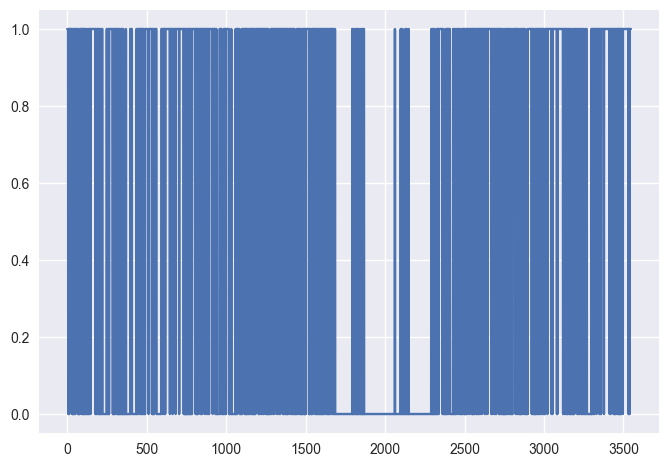

In [143]:
plt.plot(y_pred)

In [144]:
y_test

time
2021-06-09 04:00:00    0
2021-06-09 08:00:00    0
2021-06-09 12:00:00    0
2021-06-09 16:00:00    0
2021-06-09 20:00:00    0
                      ..
2023-09-15 08:00:00    1
2023-09-15 16:00:00    1
2023-09-18 00:00:00    1
2023-09-18 12:00:00    1
2023-09-18 16:00:00    1
Name: dummy, Length: 3548, dtype: int64

In [145]:
predictions = pd.DataFrame([y_pred,y_test], index=["Prediction", "Test"]).transpose()
predictions

,Prediction,Test
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3543,1,1
3544,1,1
3545,1,1
3546,1,1


In [146]:
predictions.corr()

,Prediction,Test
Prediction,1.000000,0.024862
Test,0.024862,1.000000


### Transform the output in dummy variables

In [147]:
y_pred_dummy = pd.Series(y_pred)
y_pred_dummy[y_pred_dummy>0]=1
y_pred_dummy[y_pred_dummy<0]=0

y_pred_dummy

0       1
1       1
2       1
3       1
4       1
       ..
3543    1
3544    1
3545    1
3546    1
3547    1
Length: 3548, dtype: int64

In [148]:
y_test_dummy = y_test

y_test_dummy[y_test_dummy>0]=1
y_test_dummy[y_test_dummy<0]=0

y_test_dummy

time
2021-06-09 04:00:00    0
2021-06-09 08:00:00    0
2021-06-09 12:00:00    0
2021-06-09 16:00:00    0
2021-06-09 20:00:00    0
                      ..
2023-09-15 08:00:00    1
2023-09-15 16:00:00    1
2023-09-18 00:00:00    1
2023-09-18 12:00:00    1
2023-09-18 16:00:00    1
Name: dummy, Length: 3548, dtype: int64

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

conf_matrix = confusion_matrix(y_test_dummy, y_pred_dummy)
print("Confusion Matrix:")
print(conf_matrix)

acc = accuracy_score(y_test_dummy, y_pred_dummy)
print(f"\nAccuracy: {acc:.4f}")

f1 = f1_score(y_test_dummy, y_pred_dummy)
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[1010 1181]
 [ 591  766]]

Accuracy: 0.5006
F1 Score: 0.4637


In [151]:
precision = 766/(1181+766)
#precision = 0.45

In [ ]:
(0.050 * precision - 0.035 * (1-precision))*100

-58.76707755521306